In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam_data.csv')

df.sample(5)

In [3]:
df.shape

(5572, 5)

In [4]:
#Data Cleaning
#EDA
#Text Processing
#model Building
#data evaluation
#Improvement


# 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We can see that the last three columns have very less number of non-null values(most of the values are missing), so to avoid any inconsistancy in the data , we drop the last three columns from the dataset.

In [6]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)

In [7]:
df.sample(5)

,v1,v2
2712,ham,Hey you still want to go for yogasana? Coz if ...
4718,ham,Aiyo... Her lesson so early... I'm still sleep...
2758,ham,What time. I‰Û÷m out until prob 3 or so
3746,ham,ÌÏ neva tell me how i noe... I'm not at home i...
775,ham,Thanks for picking up the trash.


Renaming the columns to avoid any confusion and to make the data more understandable.

In [8]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1882,ham,"Sorry, I can't help you on this."
419,spam,Send a logo 2 ur lover - 2 names joined by a h...
4186,ham,Dear got bus directly to calicut
2729,spam,Urgent! Please call 09066612661 from your land...
5419,ham,I'm at bruce &amp; fowler now but I'm in my mo...


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder=LabelEncoder()

In [11]:
#assigning 0 to ham and 1 to spam with the help of LabelEncoder

df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#Checking for missing values:

df.isnull().sum()

target    0
text      0
dtype: int64

No missing values were found.

In [13]:
#Check for duplicate values
df.duplicated().sum()

403

403 duplicate values were found so we drop the duplicates keeping only the first occurances in our data.

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
#After cleaning check again for duplicates
df.duplicated().sum()

0

No duplicates found. Our Data is Cleaned.

In [16]:
#Final number of rows and columns that we will be working on.
df.shape

(5169, 2)

## 2. Exploratory data analysis

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

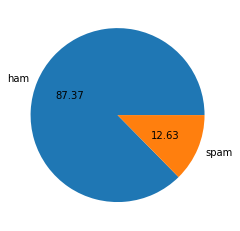

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

this visualization clearly shows that more than 80% of our data is not spam while 12% falls under spam.This indicates IMBALANCED DATA.

We add three new columns to check the no. of characters , words and sentences in the SMS

In [21]:
#import natural language processing tool kit for detailed text analysis and processing:
import nltk

In [22]:
!pip install nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#adding the character column to display the total number of characters in an SMS

df['characters']=df['text'].apply(len)
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#fetching number of words

df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#calculating the number of sentences in an SMS

df['sent_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,characters,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['characters','word_count','sent_count']].describe()

,characters,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455407,1.961308
std,58.236795,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target']==0][['characters','word_count','sent_count']].describe()

,characters,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123339,1.815545
std,56.358868,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target']==1][['characters','word_count','sent_count']].describe()

,characters,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='characters', ylabel='Count'>

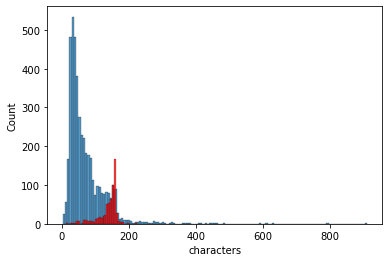

In [31]:
sns.histplot(df[df['target']==0]['characters'])
sns.histplot(df[df['target']==1]['characters'],color='red')

<AxesSubplot:xlabel='word_count', ylabel='Count'>

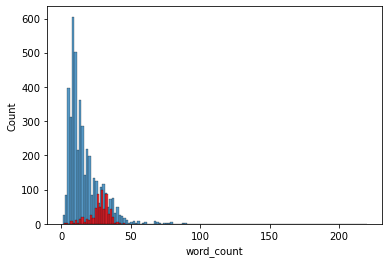

In [32]:
sns.histplot(df[df['target']==0]['word_count'])
sns.histplot(df[df['target']==1]['word_count'],color='red')

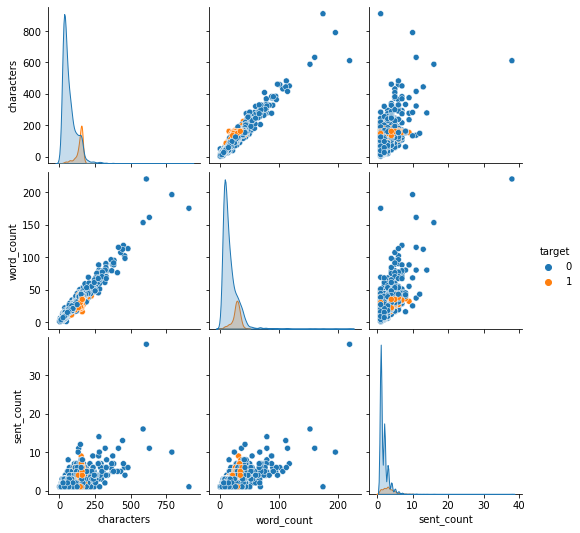

In [33]:
#to check the relationship between the features

sns.pairplot(df,hue='target')

In [34]:
#check correlation

df.corr()

,target,characters,word_count,sent_count
target,1.000000,0.384711,0.262969,0.267602
characters,0.384711,1.000000,0.965787,0.626120
word_count,0.262969,0.965787,1.000000,0.680882
sent_count,0.267602,0.626120,0.680882,1.000000


<AxesSubplot:>

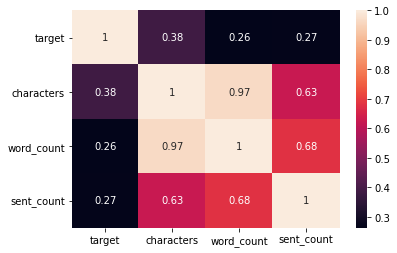

In [35]:
sns.heatmap(df.corr(),annot=True)

## data/text preprocessing


Conversion to lower case,
tokenization,
remove special characters,
remove stop words,
stemming/lemmatization

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
from nltk.stem.porter import PorterStemmer

In [40]:
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [41]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [42]:
transform_text("I loved the youtube lectures on machine learning?")

'love youtub lectur machin learn'

In [43]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()


,target,text,characters,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
!pip install wordcloud

In [47]:
from wordcloud import WordCloud

In [48]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

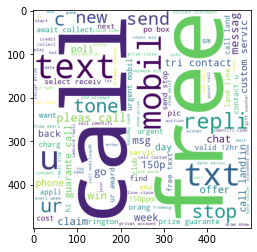

In [50]:
plt.imshow(spam_wc)

In [51]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

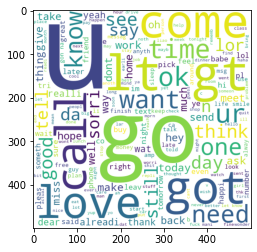

In [52]:
plt.imshow(spam_wc)

In [53]:

spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

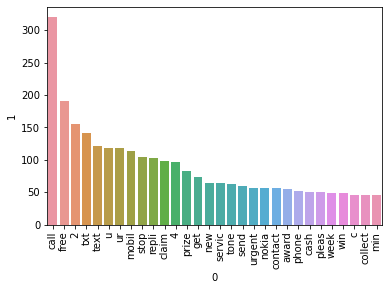

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [56]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [57]:
len(ham_corpus)

35402

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'love'),
  Text(13, 0, 'ok'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

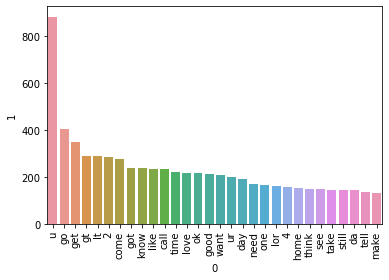

In [58]:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

Building the Model :

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [60]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 3000)

In [62]:
y=df['target'].values

In [63]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

Initially for Model building we will train our data with Naive Bayes classification as it's the most widely used technique when it comes to text classification. Later on we will compare it's performance with other models as well.

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,zero_division=1))

0.8662026295436969
[[990 140]
 [ 33 130]]
0.48148148148148145


In [69]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,zero_division=1))

0.9729311678267595
[[1130    0]
 [  35  128]]
1.0


In [70]:

bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,zero_division=1))

0.9837587006960556
[[1128    2]
 [  19  144]]
0.9863013698630136


In this stage precision score matters more than Accuracy score because the data in hand is imbalanced. Hence we choose Multinomial NB Model as it offers Highest precision 1.0 with 0 values for FP

In [72]:
!pip install xgboost

In [73]:
#importing all the popular classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:

#creating objects for the classification models
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
dt=DecisionTreeClassifier(max_depth=5)

In [75]:
lr=LogisticRegression(solver='liblinear',penalty='l1')
rf=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [76]:
#creating a dictionary with the name of the object and the classifier

classifiers={
    'SVC' : svc,
    'KN'  : knc,
    'NB'  : mnb,
    'DT'  : dt,
    'LR'  : lr,
    'RF'  : rf,
    'AdaBoost'  : abc,
    'BgC'  : bc,
    'ETC'  : etc,
    'GBC'  : gbc,
    'XGB'  : xgb


}

In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred,zero_division=1)

  return accuracy,precision

In [78]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9737045630317092, 0.9777777777777777)

In [79]:
accuracy_scores=[]
precision_scores=[]

for name, clf in classifiers.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For" ,name)
  print("Accuracy-",current_accuracy)
  print("Precision-",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy- 0.9737045630317092
Precision- 0.9777777777777777
For KN
Accuracy- 0.9095127610208816
Precision- 1.0
For NB
Accuracy- 0.9729311678267595
Precision- 1.0
For DT
Accuracy- 0.9288476411446249
Precision- 0.808695652173913
For LR
Accuracy- 0.9574632637277649
Precision- 0.9655172413793104
For RF
Accuracy- 0.9783449342614076
Precision- 0.9927007299270073
For AdaBoost
Accuracy- 0.9636504253673627
Precision- 0.9264705882352942
For BgC
Accuracy- 0.9590100541376644
Precision- 0.8666666666666667
For ETC
Accuracy- 0.979891724671307
Precision- 0.9659863945578231
For GBC
Accuracy- 0.9535962877030162
Precision- 0.9401709401709402
For XGB
Accuracy- 0.9667440061871616
Precision- 0.9545454545454546


In [80]:
perform_df = pd.DataFrame({'Algorithm': classifiers.keys(),
                   'Accuracy_max_ft_3000': accuracy_scores,
                   'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [81]:
perform_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.909513,1.000000
2,NB,0.972931,1.000000
5,RF,0.978345,0.992701
0,SVC,0.973705,0.977778
8,ETC,0.979892,0.965986
4,LR,0.957463,0.965517
10,XGB,0.966744,0.954545
9,GBC,0.953596,0.940171
6,AdaBoost,0.963650,0.926471
7,BgC,0.959010,0.866667


In [110]:
input_sms= "Congratulations you won 10000 rupees cash prize!!"

#preprocess
transformed_sms= transform_text(input_sms)
#Vectorize
vector_input= tfidf.transform([transformed_sms])
#predict
result=mnb.predict(vector_input)[0]
#display
if result==1:
    print("Spam")
else:
   print("Not Spam")

Spam
